In [230]:
import numpy as np
import pandas as pd

#shell interface similar to matlab
import matplotlib.pyplot as plt

#data viz lib similar to matlab
import seaborn

#html and xml lib
from bs4 import BeautifulSoup

import sklearn
from sklearn.linear_model import LinearRegression

#http lib 
import requests

In [231]:
url = "https://www.pro-football-reference.com/years/2007/passing.htm"

re = requests.get(url)
root = BeautifulSoup(re.content)

t = root.find("table")
df = pd.read_html(str(t))[0]

df

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tom Brady*+,NWE,30,QB,16,16,16-0-0,398,578,...,300.4,117.2,87.0,21,128,3.5,7.81,8.88,4,4
1,2,Drew Brees,NOR,28,QB,16,16,7-9-0,440,652,...,276.4,89.4,64.6,16,109,2.4,6.46,6.08,1,1
2,3,Tony Romo*,DAL,27,QB,16,16,13-3-0,335,520,...,263.2,97.4,76.9,24,176,4.4,7.42,7.17,2,2
3,4,Brett Favre*,GNB,38,QB,16,16,13-3-0,356,535,...,259.7,95.7,70.8,15,93,2.7,7.39,7.18,2,4
4,5,Carson Palmer,CIN,28,QB,16,16,7-9-0,373,575,...,258.2,86.7,62.5,17,119,2.9,6.78,6.14,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,97,Greg Lewis,PHI,27,WR,15,1,NaN,0,1,...,0.0,39.6,1.3,0,0,0.0,0.00,0.00,NaN,NaN
100,98,Mewelde Moore,MIN,25,RB,12,0,NaN,0,1,...,0.0,39.6,10.0,0,0,0.0,0.00,0.00,NaN,NaN
101,99,Willie Parker*,PIT,27,RB,15,15,NaN,0,1,...,0.0,39.6,1.1,0,0,0.0,0.00,0.00,NaN,NaN
102,100,Brad Smith,NYJ,24,WR,16,9,NaN,0,1,...,0.0,39.6,0.0,0,0,0.0,0.00,0.00,NaN,NaN


In [232]:
# remove repeating column headers
df = df[~df["Rk"].str.contains("Rk")]

# filter QBs 
# filter by QBRec
df["QBrec"] = df["QBrec"].astype(str) #convert to string
df = df[~df["QBrec"].str.contains("NaN")] #remove blank or not a number results
df = df[~df["QBrec"].str.contains("nan")]
# filter by GS
df["GS"] = pd.to_numeric(df["GS"]) #convert to number
df = df[df["GS"] > 7] 
    
df

<ipython-input-232-3ccfa836d0b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QBrec"] = df["QBrec"].astype(str) #convert to string


,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tom Brady*+,NWE,30,QB,16,16,16-0-0,398,578,...,300.4,117.2,87.0,21,128,3.5,7.81,8.88,4,4
1,2,Drew Brees,NOR,28,QB,16,16,7-9-0,440,652,...,276.4,89.4,64.6,16,109,2.4,6.46,6.08,1,1
2,3,Tony Romo*,DAL,27,QB,16,16,13-3-0,335,520,...,263.2,97.4,76.9,24,176,4.4,7.42,7.17,2,2
3,4,Brett Favre*,GNB,38,QB,16,16,13-3-0,356,535,...,259.7,95.7,70.8,15,93,2.7,7.39,7.18,2,4
4,5,Carson Palmer,CIN,28,QB,16,16,7-9-0,373,575,...,258.2,86.7,62.5,17,119,2.9,6.78,6.14,2,2
5,6,Jon Kitna,DET,35,QB,16,16,7-9-0,355,561,...,254.3,80.9,49.0,51,320,8.3,6.12,5.24,2,3
6,7,Peyton Manning*,IND,31,QB,16,16,13-3-0,337,515,...,252.5,98.0,76.9,21,124,3.9,7.31,7.29,1,2
7,8,Matt Hasselbeck*,SEA,32,QB,16,16,10-6-0,352,562,...,247.9,91.4,54.4,33,204,5.5,6.32,6.36,2,2
8,9,Derek Anderson*,CLE,24,QB,16,15,10-5-0,298,527,...,236.7,82.5,62.6,14,109,2.6,6.80,6.29,2,2
9,10,Jay Cutler,DEN,24,QB,16,16,7-9-0,297,467,...,218.6,88.1,64.3,27,153,5.5,6.77,6.30,2,3


In [233]:
df = df[["Player", "QBrec", "TD", "Rate"]]
df

,Player,QBrec,TD,Rate
0,Tom Brady*+,16-0-0,50,117.2
1,Drew Brees,7-9-0,28,89.4
2,Tony Romo*,13-3-0,36,97.4
3,Brett Favre*,13-3-0,28,95.7
4,Carson Palmer,7-9-0,26,86.7
5,Jon Kitna,7-9-0,18,80.9
6,Peyton Manning*,13-3-0,31,98.0
7,Matt Hasselbeck*,10-6-0,28,91.4
8,Derek Anderson*,10-5-0,29,82.5
9,Jay Cutler,7-9-0,20,88.1


In [234]:
names = []
winrate = []

# go down each column and take all the values into a tuple to easily convert all at once
for x in df.itertuples():
    #remove * and + from names, indicates pro bowl/all-pro
    names.append(x[1].replace("*", "").replace("+", "").strip())
    
    #get winrate from qbrecord
    record = x[2].split("-")
    games = int(record[0])+ int(record[1])+ int(record[2]) #adds up wins, losses, ties
    winrate.append(int(record[0])/games)
    
df["Player"]=names
df["win_rate"] = winrate
df["QBR"] = df["Rate"].astype(float)

df
    
    

<ipython-input-234-c303cc538fb8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Player"]=names
<ipython-input-234-c303cc538fb8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["win_rate"] = winrate
<ipython-input-234-c303cc538fb8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Player,QBrec,TD,Rate,win_rate,QBR
0,Tom Brady,16-0-0,50,117.2,1.000000,117.2
1,Drew Brees,7-9-0,28,89.4,0.437500,89.4
2,Tony Romo,13-3-0,36,97.4,0.812500,97.4
3,Brett Favre,13-3-0,28,95.7,0.812500,95.7
4,Carson Palmer,7-9-0,26,86.7,0.437500,86.7
5,Jon Kitna,7-9-0,18,80.9,0.437500,80.9
6,Peyton Manning,13-3-0,31,98.0,0.812500,98.0
7,Matt Hasselbeck,10-6-0,28,91.4,0.625000,91.4
8,Derek Anderson,10-5-0,29,82.5,0.666667,82.5
9,Jay Cutler,7-9-0,20,88.1,0.437500,88.1


In [235]:
df = df.drop("QBrec", axis=1)
df = df.drop("Rate", axis =1)
df

,Player,TD,win_rate,QBR
0,Tom Brady,50,1.000000,117.2
1,Drew Brees,28,0.437500,89.4
2,Tony Romo,36,0.812500,97.4
3,Brett Favre,28,0.812500,95.7
4,Carson Palmer,26,0.437500,86.7
5,Jon Kitna,18,0.437500,80.9
6,Peyton Manning,31,0.812500,98.0
7,Matt Hasselbeck,28,0.625000,91.4
8,Derek Anderson,29,0.666667,82.5
9,Jay Cutler,20,0.437500,88.1


Text(0, 0.5, 'QBR')

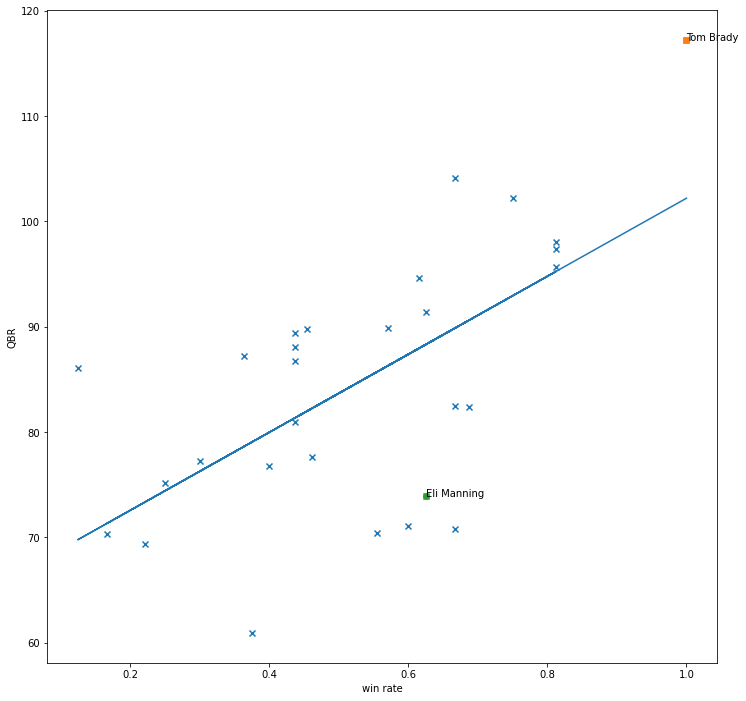

In [236]:
plt.subplots(figsize = (12, 12))
plt.scatter(marker="x", x=df["win_rate"], y =df["QBR"])

win_rate = np.array(df["win_rate"]).reshape(-1, 1)
qbr_rate = np.array(df["QBR"]).reshape(-1, 1)

reg = LinearRegression().fit(win_rate, qbr_rate)
plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')

for x in df.itertuples():
    name = x[1]
    win_rate = x[3]
    qbr_rate = x[4]
    if (name == "Eli Manning"):
        plt.scatter(marker="o", x = win_rate, y = qbr_rate)
        plt.annotate(name, (win_rate, qbr_rate))
    if (name == "Tom Brady"):
        plt.scatter(marker="o", x = win_rate, y = qbr_rate)
        plt.annotate(name, (win_rate, qbr_rate))
        
plt.xlabel("win rate")
plt.ylabel("QBR")        

In [237]:
urls = ["https://www.pro-football-reference.com/players/M/MannEl00/gamelog/2007/",
      "https://www.pro-football-reference.com/players/B/BradTo00/gamelog/2007/"]

dfs = []

for i in range(0, 2):
    re = requests.get(urls[i])
    root = BeautifulSoup(re.content)
    t = root.find("table")
    df = pd.read_html(str(t))[0]
    
    df.columns = range(df.shape[1])
    df = df[[2,5, 6, 7, 14]]
    
    #df = df[:-1]
    
    df['sum']=df[14].cumsum()
    
    
    dfs.append(df)
    i+1

dfs

[       2    5    6    7  14  sum
 0    1.0  NYG    @  DAL   4    4
 1    2.0  NYG  NaN  GNB   1    5
 2    3.0  NYG    @  WAS   1    6
 3    4.0  NYG  NaN  PHI   1    7
 4    5.0  NYG  NaN  NYJ   2    9
 5    6.0  NYG    @  ATL   2   11
 6    7.0  NYG  NaN  SFO   2   13
 7    8.0  NYG    @  MIA   0   13
 8    9.0  NYG  NaN  DAL   1   14
 9   10.0  NYG    @  DET   1   15
 10  11.0  NYG  NaN  MIN   1   16
 11  12.0  NYG    @  CHI   1   17
 12  13.0  NYG    @  PHI   1   18
 13  14.0  NYG  NaN  WAS   1   19
 14  15.0  NYG    @  BUF   0   19
 15  16.0  NYG  NaN  NWE   4   23
 16   NaN  NaN  NaN  NaN  23   46,
        2    5    6    7  14  sum
 0    1.0  NWE    @  NYJ   3    3
 1    2.0  NWE  NaN  SDG   3    6
 2    3.0  NWE  NaN  BUF   4   10
 3    4.0  NWE    @  CIN   3   13
 4    5.0  NWE  NaN  CLE   3   16
 5    6.0  NWE    @  DAL   5   21
 6    7.0  NWE    @  MIA   6   27
 7    8.0  NWE  NaN  WAS   3   30
 8    9.0  NWE    @  IND   3   33
 9   10.0  NWE    @  BUF   5   38
 10  11.0  NW

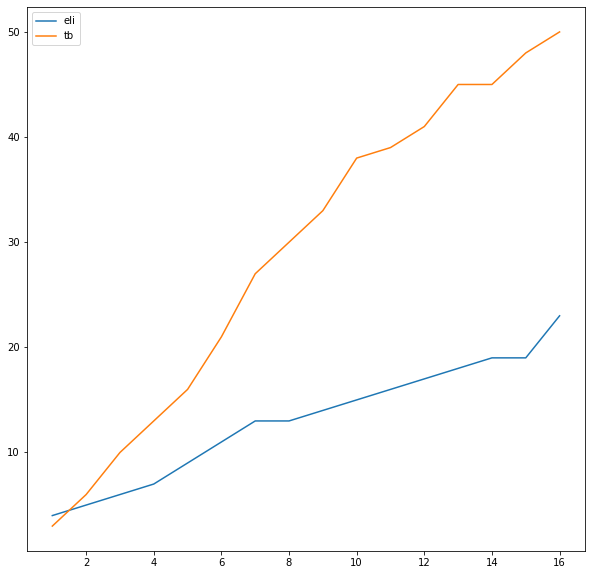

In [238]:
eli = dfs[0]
tb = dfs[1]

eli[2] = eli[2].astype(float)
eli[14] = eli[14].astype(float)
tb[2] = tb[2].astype(float)
tb[14] = tb[14].astype(float)

plt.subplots(figsize=(10,10))
plt.plot(eli[2], eli["sum"], label = "eli")
plt.plot(tb[2], tb["sum"], label = "tb")
plt.legend()
plt.show()



In [ ]:
# import geopandas

# heatmap showing touchdowns by state for eli manning per year
# ex NY/NJ being the highest bc he's played half of his home games there

# use geopandas to create us map
# scrape TDs and team from PFR
    # need to scrape @ and Opp to show state
    # create key for team name to state